In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [27]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt

#start date
start = dt.datetime(2015,1,1)
#last data point to download      
end = dt.datetime(2020,1,1) 

#symbol
symbol = 'TSLA' 

##source of the data
source = 'yahoo'

#read the data frome the web
df = web.DataReader(symbol, source, start)[["Close"]]
#reset the index to make date callable
df.reset_index(inplace=True)

In [26]:
#check the shape
df.shape

(1258, 2)

In [22]:
len(df)

1477

In [4]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)

In [5]:
training_set = df[df["Date"] < "01/01/2019"][["Close"]]
test_set = df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Close"]]

In [7]:
#feature scaling
sc = MinMaxScaler(feature_range =(0,1))
training_set_scaled = sc.fit_transform(training_set)

#creating a datastructure with 60 time-steps
X_train = []
y_train = []
for i in range(60, 1006):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [8]:
#get the sequential model
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
#adding a fifth LSTM layer and some dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/150
946/946 [==============================] - 4s 5ms/step - loss: 0.0441
Epoch 2/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0143
Epoch 3/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0143
Epoch 4/150
946/946 [==============================] - 2s 3ms/step - loss: 0.0142
Epoch 5/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0127
Epoch 6/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0132
Epoch 7/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0127
Epoch 8/150
946/946 [==============================] - 2s 3ms/step - loss: 0.0112
Epoch 9/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0105
Epoch 10/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0110
Epoch 11/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0103
Epoch 12/150
946/946 [==============================] - 2s 3ms/step - loss: 0.0091
Epoch 13/150


946/946 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 100/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 101/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0027
Epoch 102/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0028
Epoch 103/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 104/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0025
Epoch 105/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 106/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0025
Epoch 107/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0023
Epoch 108/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0025
Epoch 109/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0025
Epoch 110/150
946/946 [==============================] - 3s 3ms/step - loss: 0.0024
Epoch 

In [14]:
# Getting the data prior to 2019
dataset_train = df[df["Date"] < "01/01/2019"][["Close"]]
#getting the validation dataset for 2019
dataset_test = df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Close"]]
#adding the dataframes together
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
#getting the length of the input values to use
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
#reshaping the inputs
inputs = inputs.reshape(-1,1)
#transforming the inputs using the min-max transformation to standardise
inputs = sc.transform(inputs)
#getting out the test dataset
X_test = []
#getting the previous 60 days worth of information
for i in range(60, 312):
    X_test.append(inputs[i-60:i, 0])
#turning this into an array
X_test = np.array(X_test)
#reshaping the array
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [15]:
#use the model to predict the stock price
predicted_stock_price = model.predict(X_test)
#inversley transform the data
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

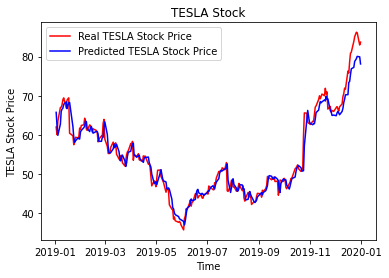

In [16]:
# Visualising the results
plt.plot(df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Date"]],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df[(df["Date"] >= "01/01/2019") & (df["Date"] < "01/01/2020")][["Date"]],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.title('TESLA Stock')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [17]:
#extract the values
test_values = [float(x) for x in dataset_test.values]
predicted = [float(x) for x in predicted_stock_price]

In [28]:
#get the pearson correlation coefficient between the predicted and actual stock prices
from scipy.stats import pearsonr
corr, p = pearsonr(test_values, predicted)
print(corr)
print(p)

0.9829651890712234
6.187117760061386e-186
